# Playing with Python - Fake News Photo test 
Notebook developed by Marcelo Rovai @ 1July18
<p> Original code developed by Ismael Bott - Data Science UDD </p>
<img src ="mjrovai_python.jpg" style="width:500px;">

### Taking Photos

- You can use 'takePhoto.py' to grab frames from your webCam
- For That, run 'takePhoto.py' 
_ Once running, go click on the "frame" and:
- Hit 'SPACE' for taking a photo
- Hit 'ESC' when finish

In [21]:
! python3 takePhoto.py

opencv_frame_0.png written!
opencv_frame_1.png written!
opencv_frame_2.png written!
opencv_frame_3.png written!
opencv_frame_4.png written!
opencv_frame_5.png written!
opencv_frame_6.png written!
opencv_frame_7.png written!
opencv_frame_8.png written!
opencv_frame_9.png written!
opencv_frame_10.png written!
Escape hit, closing...


In [23]:
# move the photos for the specific subdirectory:
! mv opencv* ./pictures

### Working on photos

In [19]:
import glob
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
images = glob.glob('./pictures/*.png')
print ("{} images were found at file".format(len(images)))

11 images were found at file


In [15]:
# Read first image on directory
test = imageio.imread(images[0])
pictures = np.zeros([test.shape[0],test.shape[1],test.shape[2],len(images)])
print ("Test Image shape is {} high X {} lenght X {} pixels".format(test.shape[0],test.shape[1], test.shape[2]))

Test Image shape is 1080 high X 1920 lenght X 3 pixels


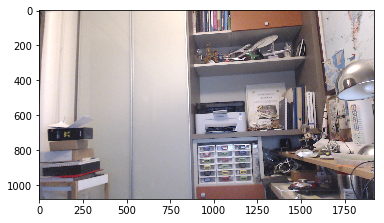

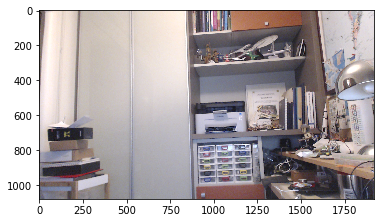

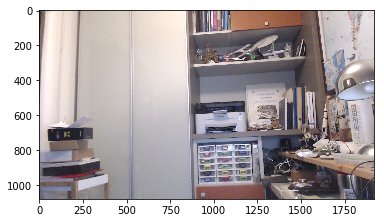

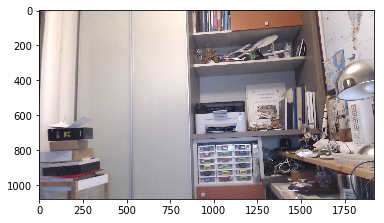

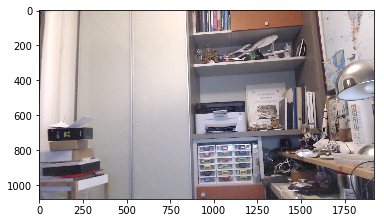

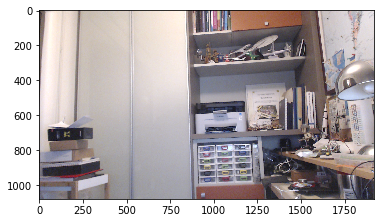

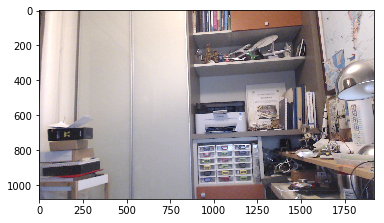

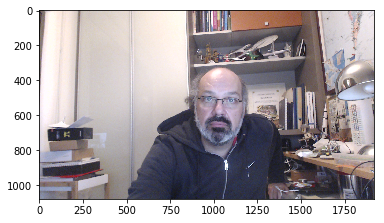

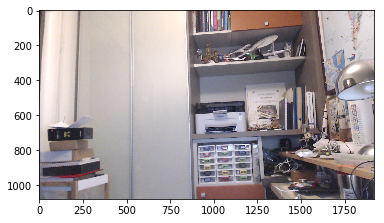

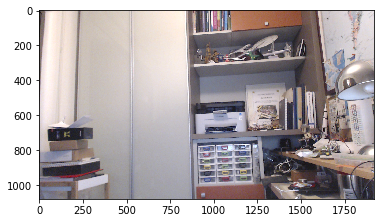

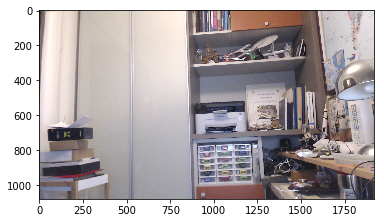

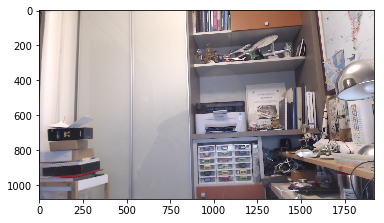

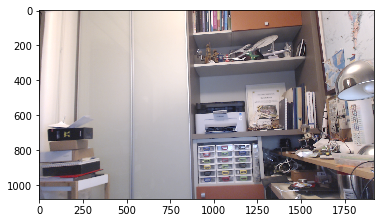

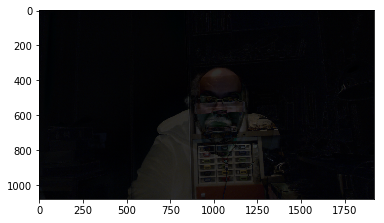

In [4]:
for i,j in enumerate(images):
	pictures[:,:,:,i] = imageio.imread(j)
	plt.figure(); plt.imshow(imageio.imread(j))

img_mean = np.zeros_like(test)
img_median = np.zeros_like(test)
img_std = np.zeros_like(test)

for i in range(3):
    img_mean[:,:,i] = np.mean(pictures[:,:,i,:], axis=2)
    img_median[:,:,i] = np.median(pictures[:,:,i,:], axis=2)
    img_std[:,:,i] = np.std(pictures[:,:,i,:], axis=2)

plt.figure(); plt.imshow(img_mean)
plt.savefig('img_mean.png')
plt.figure(); plt.imshow(img_median)
plt.savefig('img_median.png')
plt.figure(); plt.imshow(img_std)
plt.savefig('img_std.png')



### Studing Images

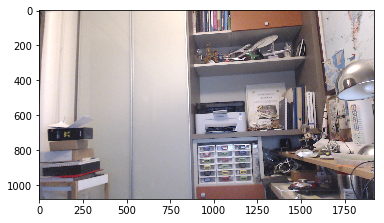

In [5]:
# read mean image from file w/o a person and display it
im_0 = imageio.imread(images[0])
plt.imshow(im_0)

(array([  13910.,  309622.,  458943.,  685349.,  662543.,  548989.,
         933427., 1214327.,  986348.,  407342.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

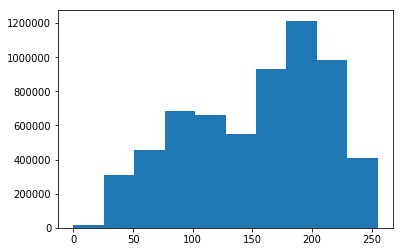

In [6]:
plt.hist(im_0.ravel())

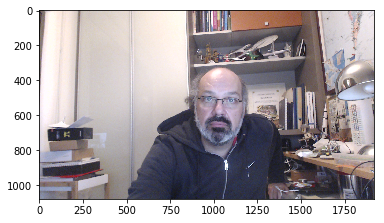

In [7]:
# read mean image from file with a person and display it
im_1 = imageio.imread(images[7])
plt.imshow(im_1)

(array([  11931.,  670973.,  718785.,  636421.,  600145.,  494372.,
         555041.,  790994., 1050521.,  691617.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

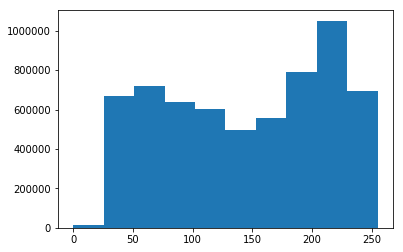

In [8]:
plt.hist(im_1.ravel())

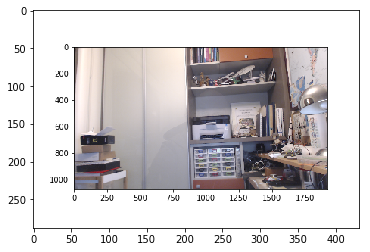

In [9]:
# read image with 'mean pixels' from file and display
im_mean = imageio.imread('img_mean.png')
plt.imshow(im_mean)

Using mean pixels, we can see the shadow of a person

(array([  1107.,  11092.,  16368.,  20700.,  20991.,  19268.,  29025.,
         34388.,  28886., 315839.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

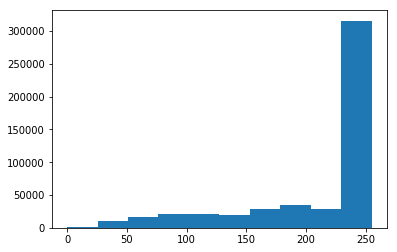

In [10]:
plt.hist(im_mean.ravel())

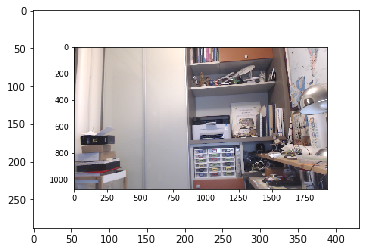

In [11]:
# read image with 'median pixels' from file and display
im_median = imageio.imread('img_median.png')
plt.imshow(im_median)

Using median pixels, we can NOT see the person that is in one of the frames

(array([  1090.,  11233.,  15867.,  20877.,  20261.,  16865.,  28430.,
         37252.,  29923., 315866.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

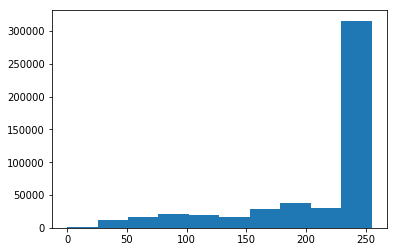

In [12]:
plt.hist(im_median.ravel())